In [1]:
import numpy as np
from matplotlib import pyplot as plt
from PIL import Image
import os

In [2]:
def create_dataset():
    directory = "../../processed_data/train_set/"
    data= []
    label= []
    for i in range(1, 7):
        for filename in os.listdir(directory+str(i)):
            if filename.endswith(".png"):
                img = Image.open(directory+str(i)+"/"+filename)
                data.append(np.array(img))
                label.append(i-1)
#             if len(data)% 100 ==0:
#                 break
#     for filename in os.listdir(directory+"10"):
#             if filename.endswith(".png"):
#                 img = Image.open(directory+"10/"+filename)
#                 data.append(np.array(img))
#                 label.append(5)
#             if len(data)% 100 ==0:
#                 break
    print(len(data))
    return data, label
            
        

In [3]:
data, labels= create_dataset()

6571


In [4]:
data = np.array(data)
data.shape

(6571, 128, 128)

In [5]:
data_cl= data[:20]

In [6]:
data_cl

array([[[255, 255, 255, ..., 255, 255, 255],
        [255, 255, 255, ..., 255, 255, 255],
        [255, 255, 255, ..., 255, 255, 255],
        ...,
        [255, 255, 255, ..., 255, 255, 255],
        [255, 255, 255, ..., 255, 255, 255],
        [255, 255, 255, ..., 255, 255, 255]],

       [[255, 255, 255, ..., 255, 255, 255],
        [255, 255, 255, ..., 255, 255, 255],
        [255, 255, 255, ..., 255, 255, 255],
        ...,
        [255, 255, 255, ..., 255, 255, 255],
        [255, 255, 255, ..., 255, 255, 255],
        [255, 255, 255, ..., 255, 255, 255]],

       [[255, 255, 255, ..., 255, 255, 255],
        [255, 255, 255, ..., 255, 255, 255],
        [255, 255, 255, ..., 255, 255, 255],
        ...,
        [255, 255, 255, ..., 255, 255, 255],
        [255, 255, 255, ..., 255, 255, 255],
        [255, 255, 255, ..., 255, 255, 255]],

       ...,

       [[255, 255, 255, ..., 255, 255, 255],
        [255, 255, 255, ..., 255, 255, 255],
        [255, 255, 255, ..., 255, 255, 255

In [7]:
import pickle as pkl

filename = '../../resources/CNN_Input'
fileObject = open(filename, 'wb')

pkl.dump(data_cl, fileObject)
fileObject.close()

filename = '../../resources/CNN_labels'
fileObject = open(filename, 'wb')
pkl.dump(labels[:20], fileObject)
fileObject.close()

FileNotFoundError: [Errno 2] No such file or directory: '../../resources/CNN_Input'

In [10]:
preprocessed_data = data/255
labels= np.array(labels).reshape(-1,1)

In [11]:
print("Drawings shape before : ", preprocessed_data.shape)
preprocessed_data = np.expand_dims(preprocessed_data, axis=3)
print("Drawings shape after : ", preprocessed_data.shape)
print("Label shape : ", labels.shape)

Drawings shape before :  (6571, 128, 128)
Drawings shape after :  (6571, 128, 128, 1)
Label shape :  (6571, 1)


In [12]:
from sklearn.model_selection import train_test_split

# split data in train/val/test set
train_val_data, test_data, train_val_labels, test_labels = train_test_split(
    preprocessed_data, 
    labels,
    test_size=0.2, 
    random_state=42, 
    shuffle=True
)

train_data, val_data, train_labels, val_labels = train_test_split(
    train_val_data, 
    train_val_labels,
    test_size=0.3, 
    random_state=42, 
    shuffle=True
)

In [13]:
import tensorflow as tf
from tensorflow.keras import layers, models

# pixel width and height of our images
input_size = 28

# number of filters in the convnet layer
filters = 16

# conv net parameters
strides = (2, 2)
pool_size = (2,2)
kernel_size = (5, 5)

In [14]:
model = tf.keras.Sequential(
    [
        layers.Conv2D(filters, kernel_size, activation = "relu", input_shape= (128,128, 1)),
        layers.MaxPool2D(pool_size=pool_size, strides= strides, padding='same'),
        layers.Conv2D(filters/2, kernel_size, activation = "relu"),
        layers.MaxPool2D(pool_size=pool_size, strides= strides, padding='same'),
        layers.Dropout(0.2), # dropout layer is there to defeat overfitting
        layers.Flatten(),
        layers.Dense(units=6),
    ]
)

# model.build()
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 124, 124, 16)      416       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 62, 62, 16)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 58, 58, 8)         3208      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 29, 29, 8)        0         
 2D)                                                             
                                                                 
 dropout (Dropout)           (None, 29, 29, 8)         0         
                                                                 
 flatten (Flatten)           (None, 6728)              0

In [15]:
model.compile(optimizer= tf.keras.optimizers.Adam(learning_rate= 0.00001), loss= tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), metrics= ['accuracy'])

history = model.fit(x=train_data,y=train_labels, validation_data=(train_val_data, train_val_labels), epochs=5)

Epoch 1/5
115/115 [==============================] - 61s 523ms/step - loss: 1.7572 - accuracy: 0.2694 - val_loss: 1.6888 - val_accuracy: 0.2681
Epoch 2/5
115/115 [==============================] - 59s 517ms/step - loss: 1.6395 - accuracy: 0.3596 - val_loss: 1.5606 - val_accuracy: 0.2637
Epoch 3/5
115/115 [==============================] - 60s 525ms/step - loss: 1.5034 - accuracy: 0.4558 - val_loss: 1.4093 - val_accuracy: 0.7275
Epoch 4/5
115/115 [==============================] - 59s 511ms/step - loss: 1.3359 - accuracy: 0.6138 - val_loss: 1.2101 - val_accuracy: 0.8895
Epoch 5/5
115/115 [==============================] - 57s 496ms/step - loss: 1.1226 - accuracy: 0.7633 - val_loss: 0.9681 - val_accuracy: 0.9998


In [16]:
model.evaluate(test_data, test_labels, verbose=0)

[0.9632514715194702, 1.0]

In [ ]:
model.save("../../models/preprocessed_data_cnn_model.h5")

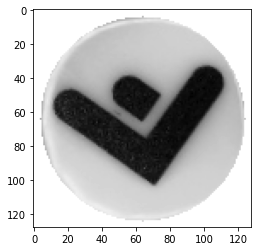

In [37]:
img = Image.open("../../processed_data/train_set/6/16_09_21_07_017.png")
plt.imshow(img, cmap="gray")

In [38]:
prediction = model.predict(np.array(img).reshape(1, 128, 128, 1))
print(prediction)

[[ -52.528576  -74.914925  -83.88776  -218.44269  -186.25255   281.46457 ]]


In [39]:
classes = np.argmax(prediction, axis = 1)
print(classes)

[5]


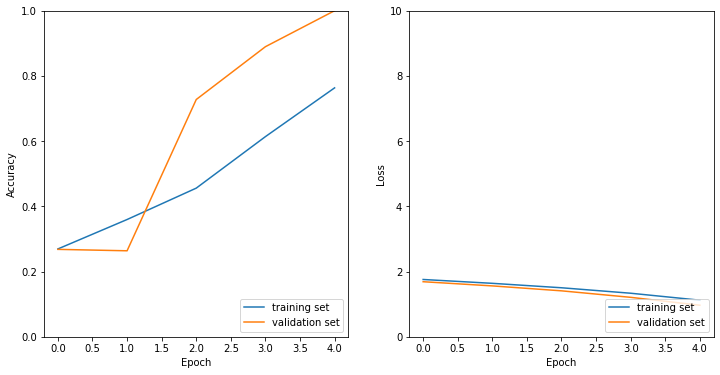

In [20]:
def plot_history(history):
    """ This helper function takes the tensorflow.python.keras.callbacks.History
    that is output from your `fit` method to plot the loss and accuracy of
    the training and validation set.
    """
    fig, axs = plt.subplots(1,2, figsize=(12,6))
    axs[0].plot(history.history['accuracy'], label='training set')
    axs[0].plot(history.history['val_accuracy'], label = 'validation set')
    axs[0].set(xlabel = 'Epoch', ylabel='Accuracy', ylim=[0, 1])

    axs[1].plot(history.history['loss'], label='training set')
    axs[1].plot(history.history['val_loss'], label = 'validation set')
    axs[1].set(xlabel = 'Epoch', ylabel='Loss', ylim=[0, 10])
    
    axs[0].legend(loc='lower right')
    axs[1].legend(loc='lower right')
    
plot_history(history)

In [21]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
pred_labels = model.predict(test_data).argmax(axis=1)
print(classification_report(test_labels, pred_labels))
confusion_matrix(test_labels, pred_labels)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       168
           1       1.00      1.00      1.00       205
           2       1.00      1.00      1.00       235
           3       1.00      1.00      1.00       188
           4       1.00      1.00      1.00       162
           5       1.00      1.00      1.00       357

    accuracy                           1.00      1315
   macro avg       1.00      1.00      1.00      1315
weighted avg       1.00      1.00      1.00      1315



array([[168,   0,   0,   0,   0,   0],
       [  0, 205,   0,   0,   0,   0],
       [  0,   0, 235,   0,   0,   0],
       [  0,   0,   0, 188,   0,   0],
       [  0,   0,   0,   0, 162,   0],
       [  0,   0,   0,   0,   0, 357]], dtype=int64)